In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data and parameters to use

In [9]:
# Read in the data
df_projects = pd.read_csv('data/projectList.csv')
# Drop Title, ArticleURL columns
df_projects.drop(['Title', 'ArticleURL'], axis=1, inplace=True)
df_projects.head()

,Year,Project,Country,Language,glottocode,isocode,Cinema/TV,Social media,State initiative,External organization,...,Technology,Radio,Documentation,Books and educational material,Promotes use of the language,Teaches the language,Target public,Alternative project details,Family,Speakers
0,2011,Auto-documentación lingüística Jodï,Venezuela,Hoti,yuwa1244,yau,0,0,0,0,...,0,0,1,1,0,0,Todos,-,-,1500
1,2013,Rama Language Project,Nicaragua,Rama,rama1270,rma,0,0,0,0,...,0,0,1,1,1,0,Todos,-,Chibchan,740
2,2023,Aún nuestra lengua vive: fogatas nahuas móvile...,Mexico,Tlaxcala-Puebla-Central Nahuatl,cent2132,nhn,0,0,0,0,...,0,0,0,0,1,1,Todos,Uso de lengua en comunidad,Uto-Aztecan,40000
3,2023,"Inadea (proyectos varios: charlas, cursos de s...",Peru,Huaylay,huay1239,-,0,0,0,0,...,0,0,0,1,0,1,Todos,-,Quechuan,587520
4,2020,Micronoticiero Letras TV Willakun,Peru,Ayacucho Quechua,ayac1239,quy,1,1,0,0,...,1,0,0,0,1,0,Todos,-,Quechuan,1270000


In [11]:
# Function to get the number of projects by year
def get_projects_by_year(df_filtered):
    df_projects_year=df_filtered.copy(deep=True)
    df_projects_year.drop(['Family', 'Language', 'glottocode', 'isocode', 'Speakers'], axis=1, inplace=True)
    df_projects_year.drop_duplicates(inplace=True)
    df_projects_year=df_projects_year.groupby(['Year']).agg({'Project':'count', 'Cinema/TV':'sum', 'Social media':'sum', 'Radio':'sum', 'Music':'sum', 'Technology':'sum', 'Teaches the language':'sum', 'State initiative':'sum', 'External organization':'sum', 'Universities and institutes':'sum', 'Alternative projects from the community':'sum', 'Documentation': 'sum', 'Books and educational material': 'sum', 'Promotes use of the language': 'sum'}).reset_index().drop_duplicates()
    return df_projects_year

In [47]:
# Function to get the number of projects by country
def get_projects_by_country():
    df_project_by_country=df_projects.copy(deep=True)
    df_project_by_country["nLanguages"] = df_project_by_country.groupby("Project")["Language"].transform("nunique")
    df_project_by_country.drop(['Family', 'Language', 'glottocode', 'isocode','Speakers'], axis=1, inplace=True)
    df_project_by_country.drop_duplicates(inplace=True)
    return df_project_by_country

In [71]:
# Define the list of columns to filter
origin_columns = ['State initiative', 'External organization', 'Universities and institutes', 'Alternative projects from the community']
characteristics_columns = ["Cinema/TV", "Social media", "Radio", "Music", "Technology", "Teaches the language", "Documentation", "Books and educational material"]

## sns configuration

In [39]:
# Set the style of the plots
sns.set_style("darkgrid")

# Define the color palette
color_palette = sns.color_palette("husl", 4)

# Define a color for each category using Seaborn's color palette
color_dict = {
    'State initiative': sns.color_palette("husl", 4)[0],
    'External organization': sns.color_palette("husl", 4)[1],
    'Universities and institutes': sns.color_palette("husl", 4)[2],
    'Alternative projects from the community': sns.color_palette("husl", 4)[3]
}

# Set the global parameters for the plots
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'light'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'light'

# Plots

## Projects by year and origin

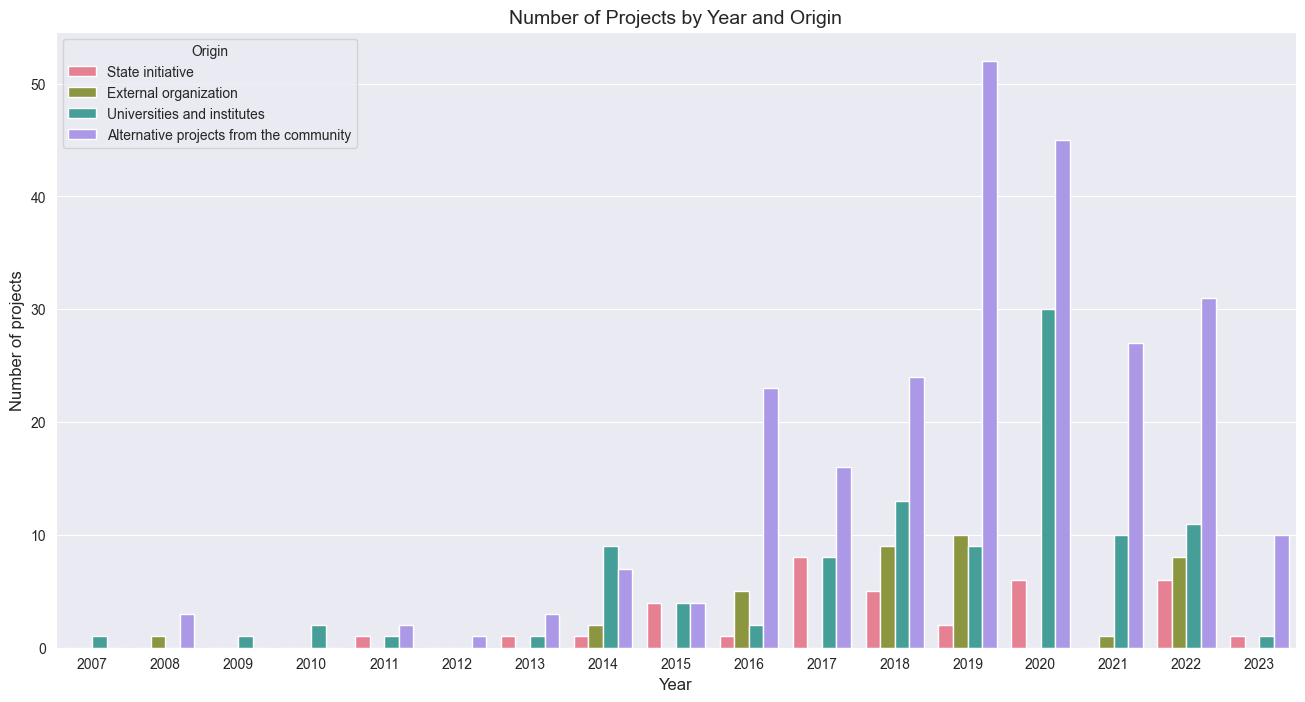

In [44]:
# Get the number of projects by year
df = get_projects_by_year(df_projects)

# Melt the DataFrame into a long format
df_melted = pd.melt(df, id_vars='Year', value_vars=origin_columns)

# Plot the data
plt.figure(figsize=(16, 8))
sns.barplot(data=df_melted, x='Year', y='value', hue='variable', palette=color_dict)
plt.title('Number of Projects by Year and Origin')
plt.ylabel('Number of projects')
plt.xlabel('Year')
plt.legend(title='Origin')
plt.savefig('images/number_of_projects_by_year_and_origin.png', dpi=300, bbox_inches='tight')
plt.show()

## Top 30 languages with most projects

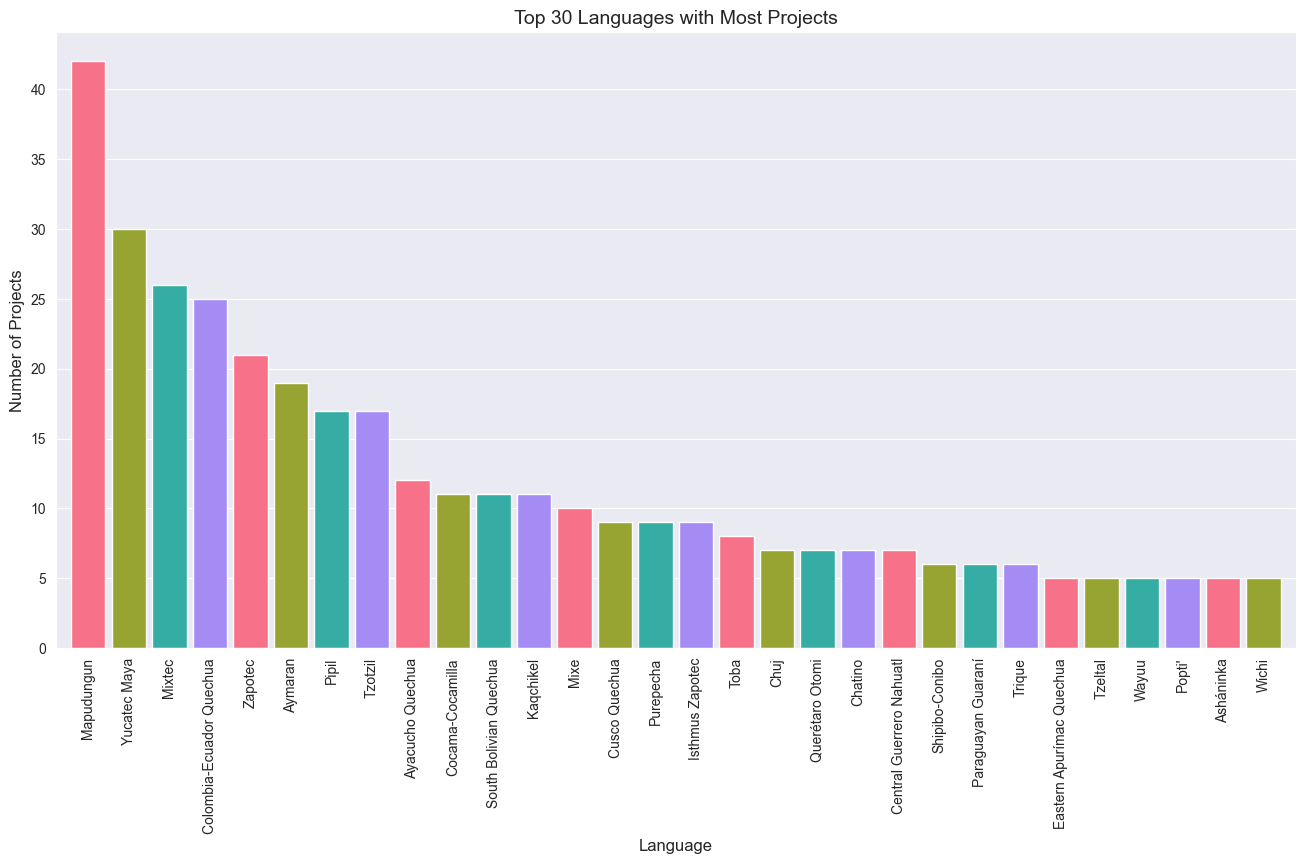

In [51]:
# Group by 'Lengua', count, reset index, and sort
df_grouped = df_projects.groupby('Language').count().reset_index().sort_values(by='Project', ascending=False)

# Filter to include only the top 30 languages
df_filtered = df_grouped[0:30]

# Plot the data
plt.figure(figsize=(16, 8))
plt.bar(df_filtered['Language'], df_filtered['Project'], color=color_palette, width=0.85)
plt.xlabel('Language')
plt.ylabel('Number of Projects')
plt.xticks(rotation='vertical')
plt.title('Top 30 Languages with Most Projects')

# Adjust the x-axis limits
plt.xlim(-0.8, len(df_filtered['Language'])-0.2)
# Keep only horizontal grid lines
plt.grid(axis='x')

plt.savefig('images/top_30_languages_with_most_projects.png', dpi=300, bbox_inches='tight')
plt.show()

## Projects by country

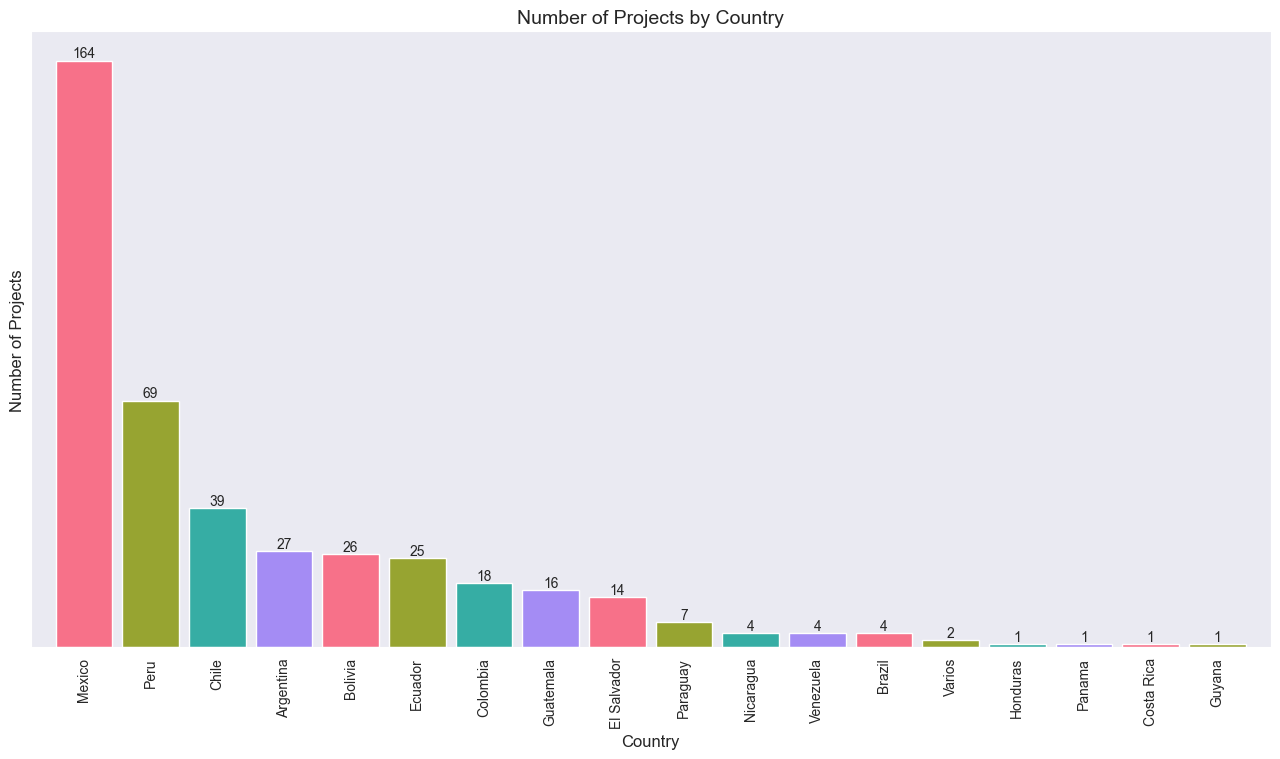

In [55]:
df_projects_country = get_projects_by_country()
# Group the data, count the projects, reset the index, and sort the values
df_grouped = df_projects_country.groupby('Country').count().reset_index().sort_values(by='Project', ascending=False)

# Plot the data
plt.figure(figsize=(16, 8))
bars = plt.bar(df_grouped['Country'], df_grouped['Project'], color=color_palette, width=0.85)

# Add the number values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Remove the y-axis
plt.yticks([])
# Keep only horizontal grid lines
plt.grid(axis='x')

# Adjust the x-axis limits
plt.xlim(-0.8, len(df_grouped['Country'])-0.2)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.xticks(rotation='vertical')
plt.title('Number of Projects by Country')
plt.savefig('images/number_of_projects_by_country.png', dpi=300, bbox_inches='tight')
plt.show()


## Projects by country and origin

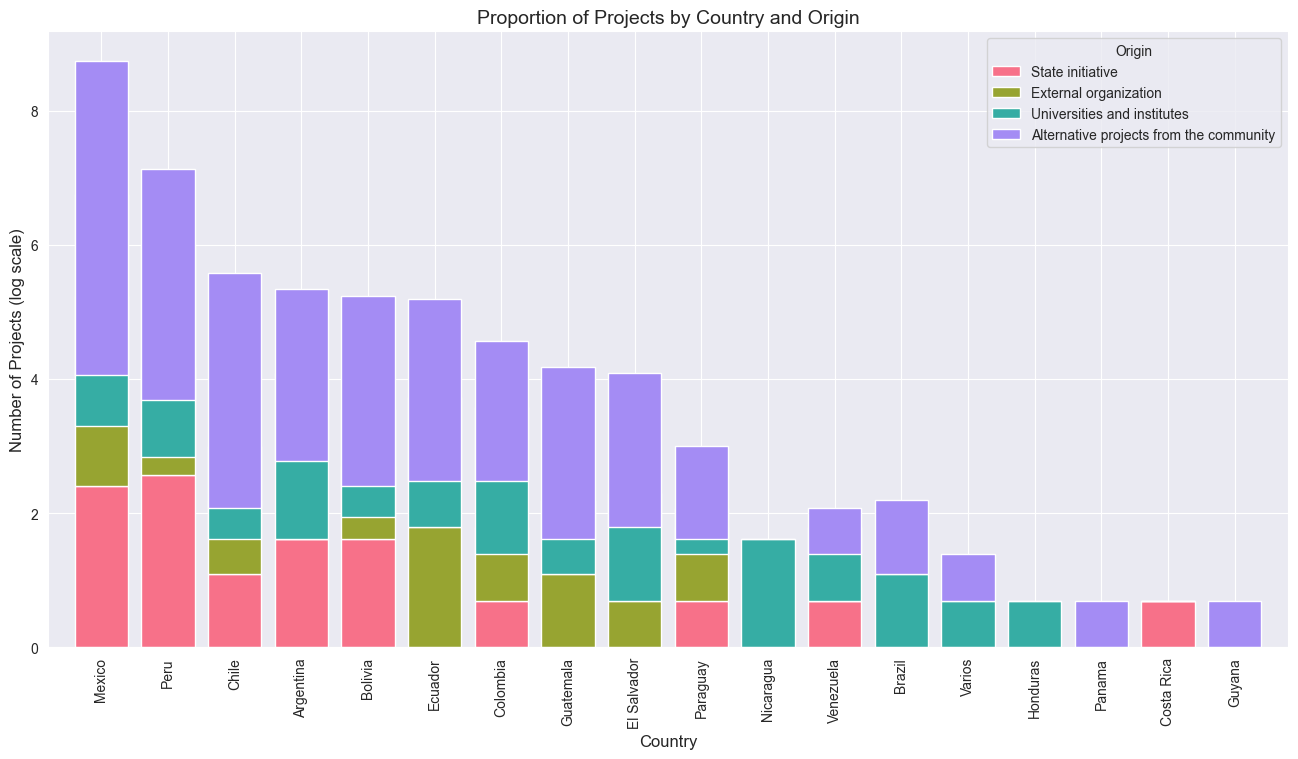

In [67]:
df_projects_country = get_projects_by_country()
# Group the data, count the projects, reset the index, and sort the values
df_grouped = df_projects_country.groupby('Country').agg({
    'Project': 'count',
    'State initiative': 'sum',
    'External organization': 'sum',
    'Universities and institutes': 'sum',
    'Alternative projects from the community': 'sum'
}).reset_index().sort_values(by='Project', ascending=False)

# Plot the data
plt.figure(figsize=(16, 8))

# Plot a stacked bar chart with logarithmic values
bars1 = plt.bar(df_grouped['Country'], np.log1p(df_grouped['State initiative']), color=color_dict['State initiative'], width=0.8)
bars2 = plt.bar(df_grouped['Country'], np.log1p(df_grouped['External organization']), bottom=np.log1p(df_grouped['State initiative']), color=color_dict['External organization'], width=0.8)
bars3 = plt.bar(df_grouped['Country'], np.log1p(df_grouped['Universities and institutes']), bottom=np.log1p(df_grouped['State initiative'] + df_grouped['External organization']), color=color_dict['Universities and institutes'], width=0.8)
bars4 = plt.bar(df_grouped['Country'], np.log1p(df_grouped['Alternative projects from the community']), bottom=np.log1p(df_grouped['State initiative'] + df_grouped['External organization'] + df_grouped['Universities and institutes']), color=color_dict['Alternative projects from the community'], width=0.8)

# Add a legend
plt.legend([bars1, bars2, bars3, bars4], origin_columns, loc='upper right', title='Origin')

# Adjust the x-axis limits
plt.xlim(-0.8, len(df_grouped['Country'])-0.2)

# Add labels and title
plt.xlabel('Country')
plt.xticks(rotation='vertical')
plt.ylabel('Number of Projects (log scale)')
plt.title('Proportion of Projects by Country and Origin')
plt.savefig('images/proportion_of_projects_by_country_and_origin.png', dpi=300, bbox_inches='tight')
plt.show()

## Correlation between number of speakers and number of projects

## Projects by year and characteristic

c:\Users\amy22\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


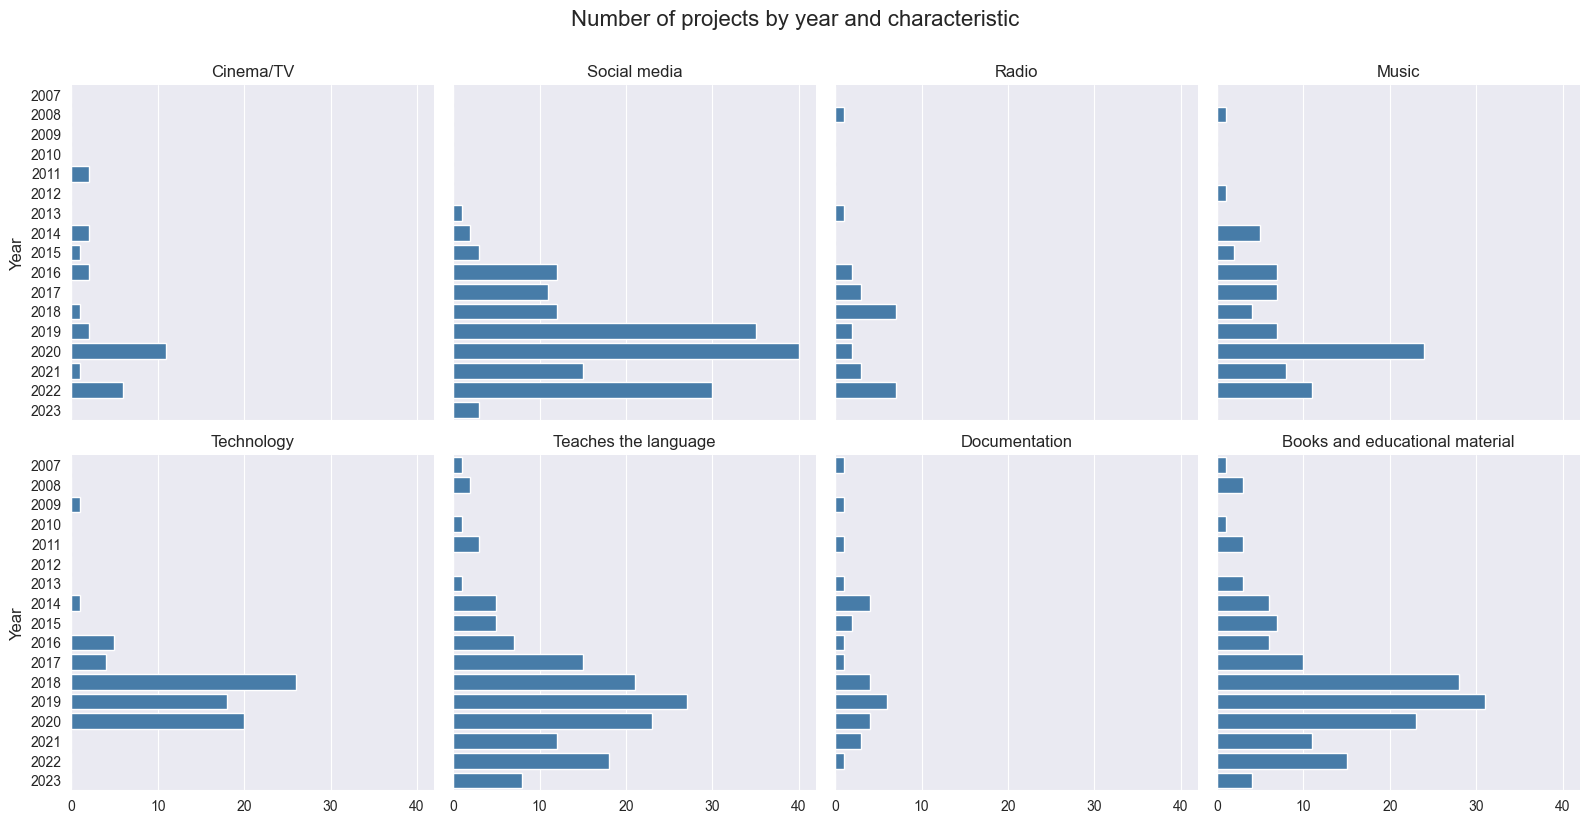

In [75]:
df = get_projects_by_year(df_projects)
df_melted = df.melt(id_vars='Year', value_vars=characteristics_columns, var_name='Characteristic', value_name='Number of Projects')

# Create the catplot
g = sns.catplot(x='Number of Projects', y='Year', col='Characteristic', data=df_melted, kind='bar', col_wrap=4, height=4, aspect=1, sharey=True, orient='h', color='#377eb8')

# Set the titles for each subplot
g.set_titles("{col_name}")

# Set the labels for the x and y axes
g.set_axis_labels("", "Year")

# Set the title for the entire plot
g.figure.suptitle('Number of projects by year and characteristic', fontsize=16, y=1.05)

# Save the plot
g.savefig('images/number_of_projects_by_year_and_characteristic.png', dpi=300, bbox_inches='tight')
plt.show()

## Number of projects and their origin through the years

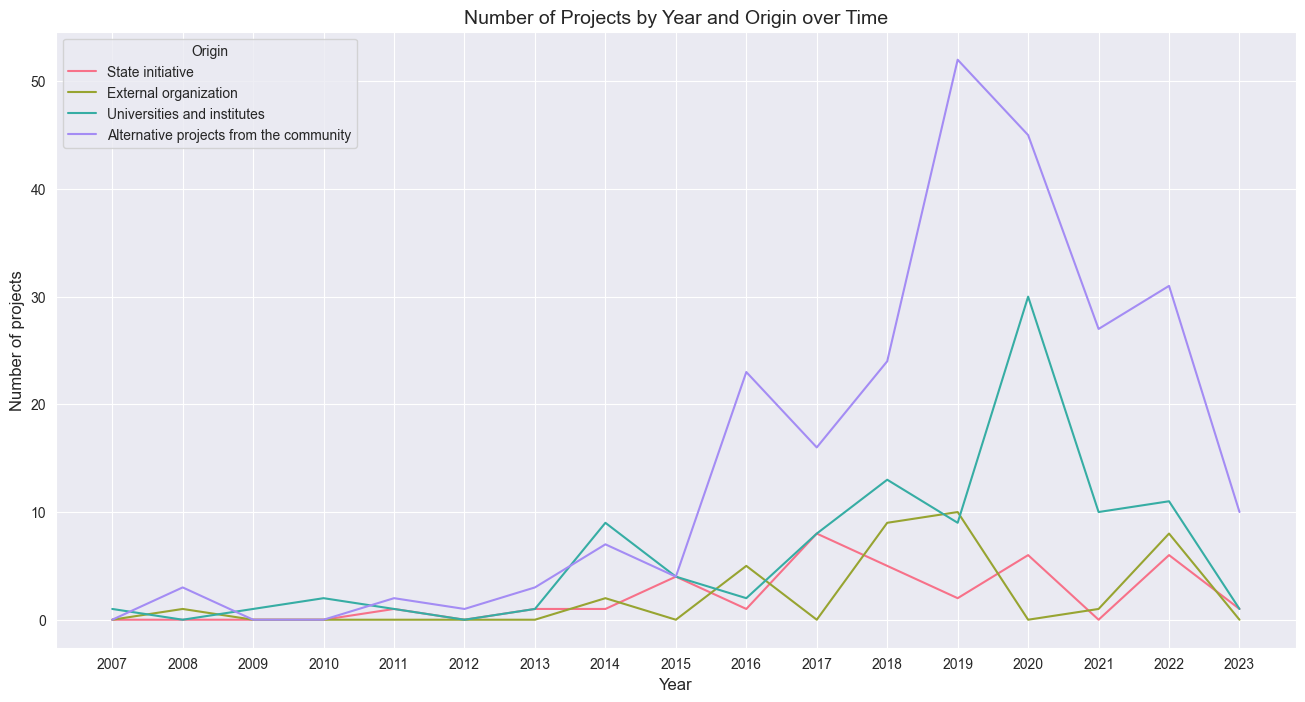

In [84]:
df = get_projects_by_year(df_projects)

# Melt the DataFrame into a long format
df_melted = pd.melt(df, id_vars='Year', value_vars=origin_columns)

# Plot the data
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_melted, x='Year', y='value', hue='variable', palette=color_dict)
plt.title('Number of Projects by Year and Origin over Time')
plt.ylabel('Number of projects')
plt.xlabel('Year')
plt.legend(title='Origin')

# Set xticks
plt.xticks(np.arange(min(df['Year']), max(df['Year'])+1, 1))

plt.savefig('images/number_of_projects_by_year_and_origin_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

## Proportion of projects by origin per 5 years

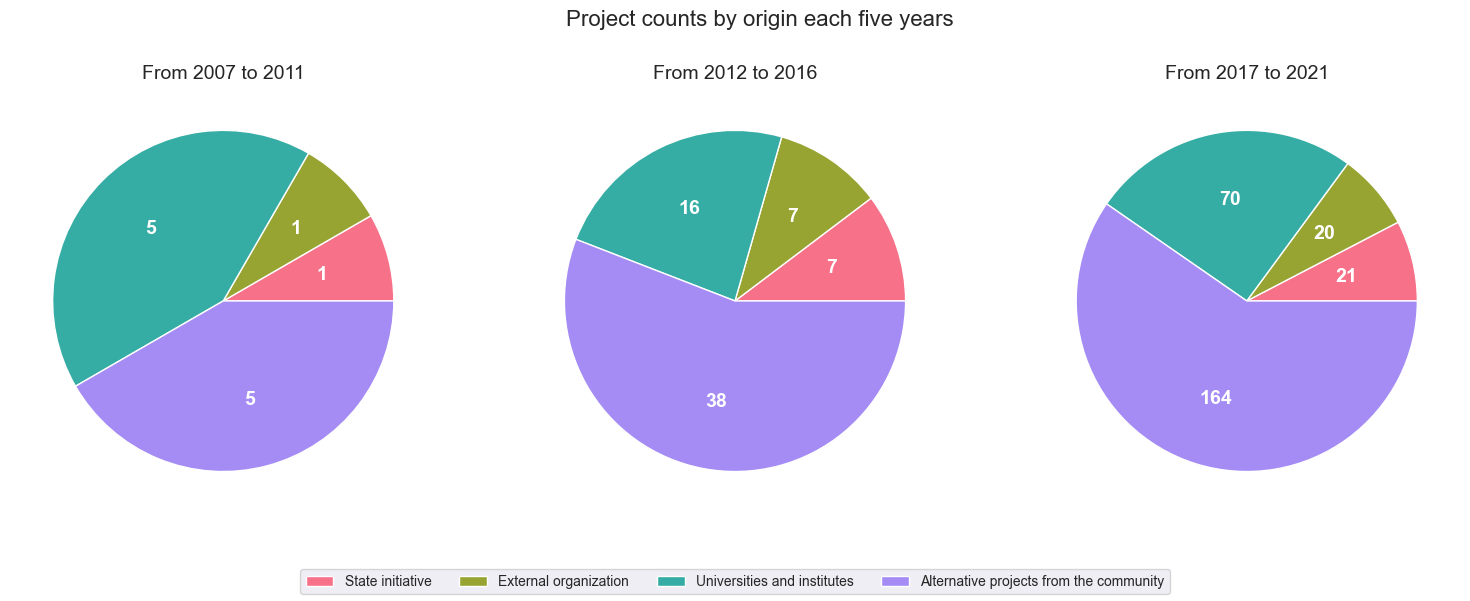

In [88]:
df_projects_by_year=get_projects_by_year(df_projects)
df_projects_by_year.set_index('Year', inplace=True)
df_projects_by_year = df_projects_by_year[origin_columns]

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Project counts by origin each five years', fontsize=16)

for i, ax in enumerate(axs.flat):
    start = 2007+(i)*5
    end = start+5
    # Get the sum of projects by origin for the given period
    data = df_projects_by_year.loc[start:end-1].sum()
    # Create the pie chart
    patches, texts, autotexts = ax.pie(data, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), colors=color_palette, textprops={'color':"w", 'weight':'bold', 'fontsize':14})
    # Set the title for the subplot
    ax.set_title(f'From {start} to {end-1}')

# Create the legend
fig.legend(patches, data.index, loc="lower center", ncol=4)
plt.subplots_adjust(right=0.85)  # Adjust the right padding to make room for the legend

plt.savefig('images/project_counts_by_origin_each_five_years.png', dpi=300, bbox_inches='tight')
plt.show()